In [ ]:
!pip install opencv-python

     |████████████████████████████████| 50.4 MB 13 kB/s  eta 0:00:01


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dog = cv2.imread('dog.jpeg',0)

(-0.5, 274.5, 182.5, -0.5)

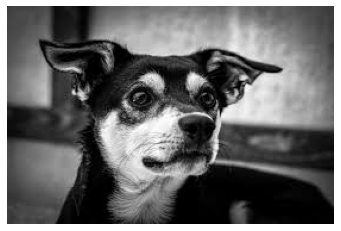

In [6]:
plt.imshow(dog,cmap='gray')
plt.axis('off')

In [7]:
dog.shape

(183, 275)

In [8]:
kl = cv2.imread('kl.jpeg')
kl = cv2.cvtColor(kl, cv2.COLOR_BGR2RGB)

In [32]:
def read_image(path):
  img = cv2.imread(path)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 999.5, 666.5, -0.5)

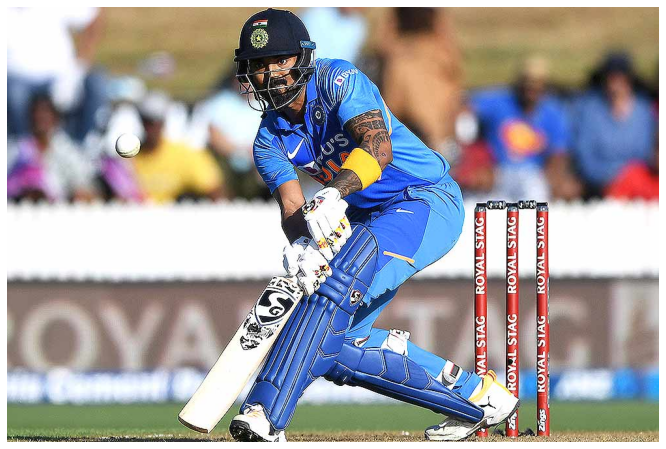

In [9]:
plt.figure(figsize = [12,8])
plt.imshow(kl)
plt.axis('off')

In [10]:
kl.shape

(667, 1000, 3)

In [11]:
def show_channels(img):
    plt.imshow(img)
    plt.title('Original image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    fit,ax = plt.subplots(1,3,figsize = (16,12))
    ax[0].imshow(red_channel,cmap = 'Reds')
    ax[0].set_title('Red Channel')
    ax[1].imshow(green_channel,cmap = 'Greens')
    ax[1].set_title('Green Channel')
    ax[2].imshow(blue_channel,cmap = 'Blues')
    ax[2].set_title('Blue channel')
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

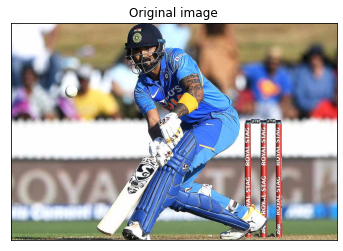

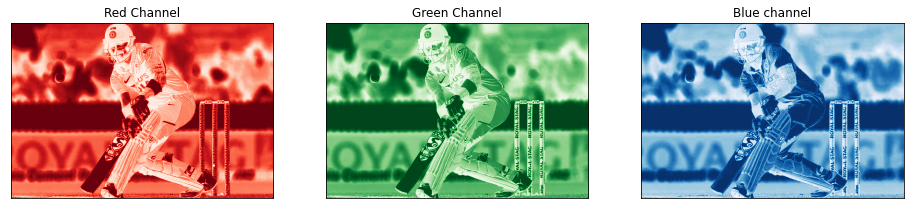

In [12]:
show_channels(kl)

## Histogram of an image

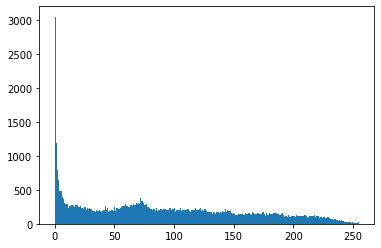

In [17]:
plt.hist(dog.flatten(), bins=256)
plt.show()

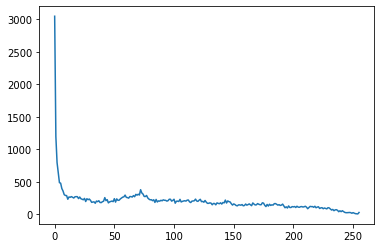

In [18]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
histg = cv2.calcHist([dog],[0],None,[256],[0,256])  
plt.plot(histg)

# 1. Write a program to perform histogram equalization on a gray scale image.
- Display the original and histogram-equalized images.
- Repeat the experiment for 3 different types (extreme dark, medium dark, and extreme light) of input gray scale images.


In [30]:
def histogram_equalization_gray(img):
  equ = cv2.equalizeHist(img)

  plt.figure(figsize = (20,10))
  plt.subplot(221)
  plt.imshow(img,cmap = 'gray')
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(222)
  plt.imshow(equ, cmap = 'gray')
  plt.title('modified image')
  plt.axis('off')

  plt.subplot(223)
  plt.hist(img.flatten(),bins=256)
  plt.title('Histogram of original image')

  plt.subplot(224)
  plt.hist(equ.flatten(),bins= 256)
  plt.title('Equalized histogram')

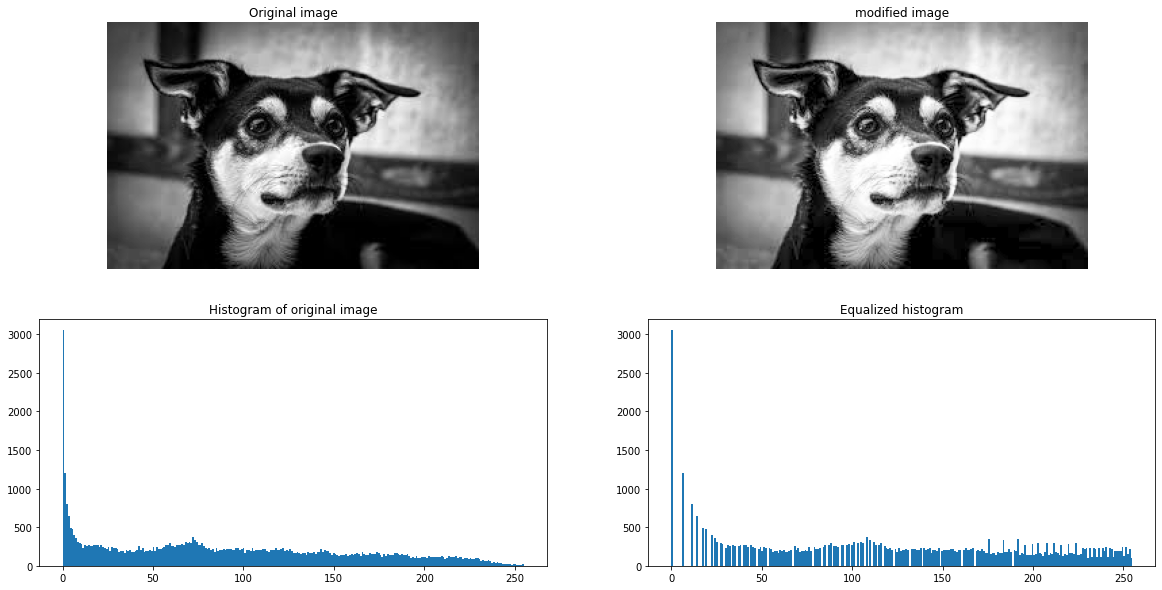

In [31]:
histogram_equalization_gray(dog)

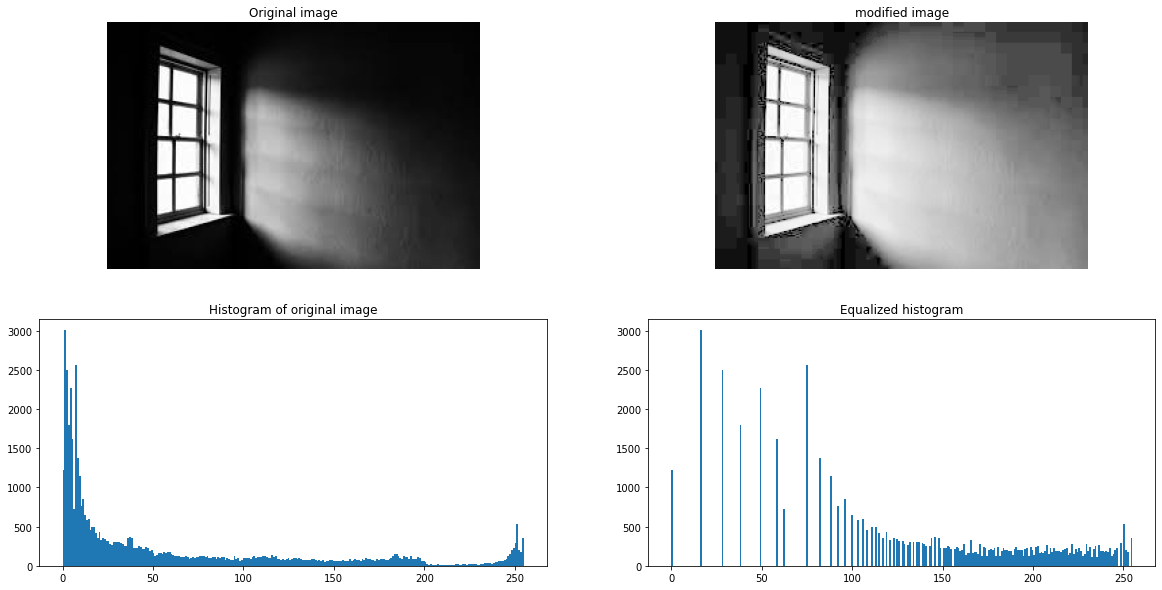

In [35]:
# dark image 
dark = cv2.imread('/content/dark.jpeg',0)
histogram_equalization_gray(dark)

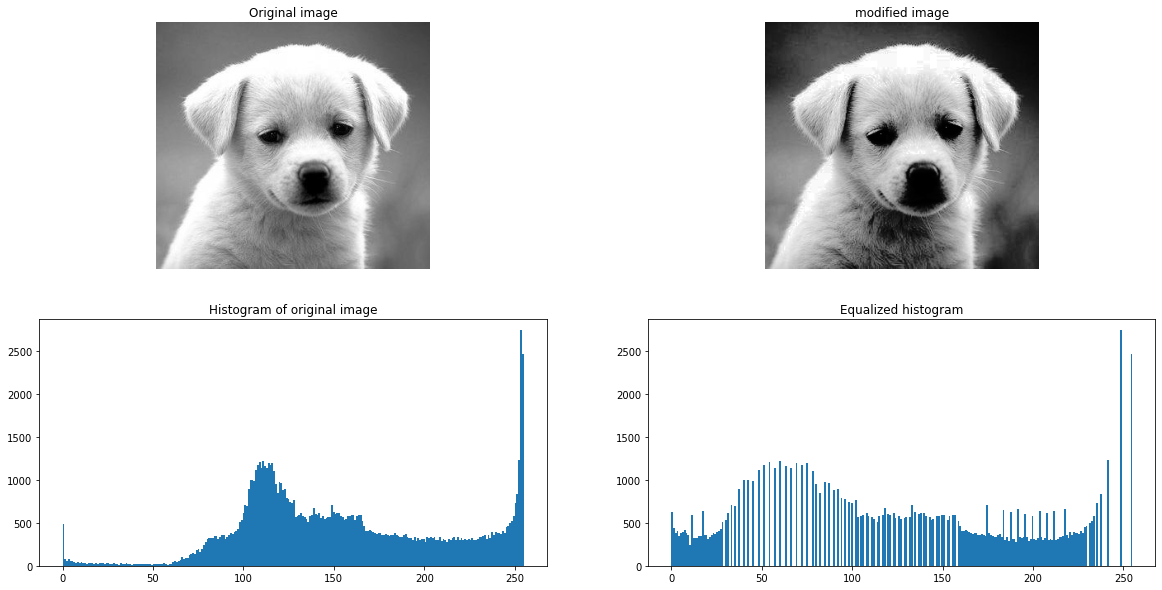

In [33]:
# light image
dog_light = cv2.imread('/content/dog_light.jpeg',0)
histogram_equalization_gray(dog_light)

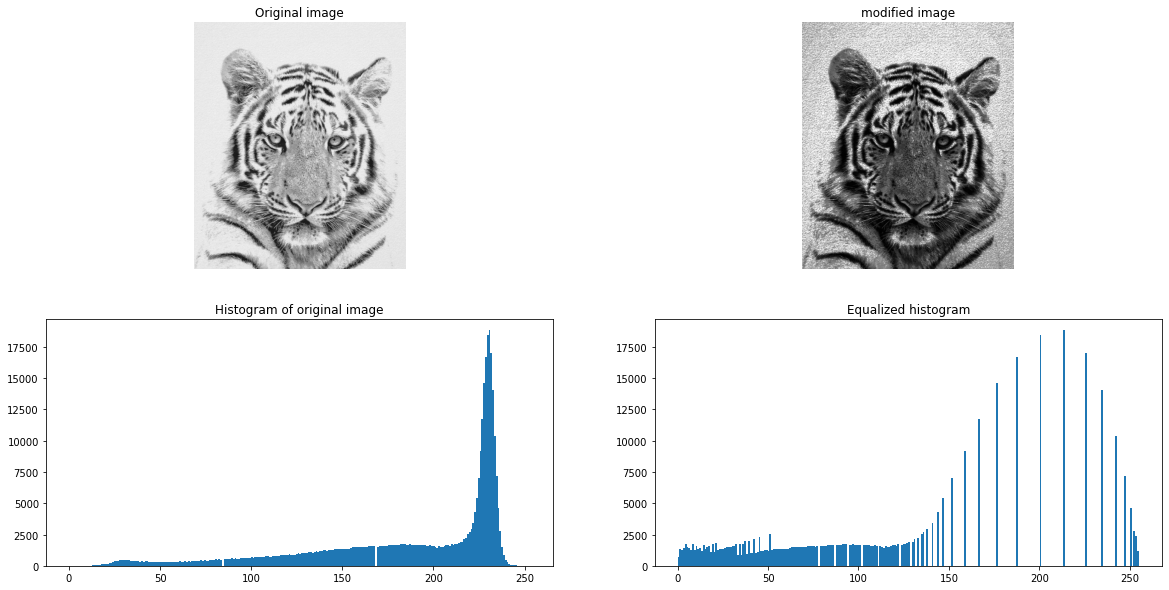

In [36]:
# medium dark image
tiger = cv2.imread('/content/tiger.jpg',0)
histogram_equalization_gray(tiger)

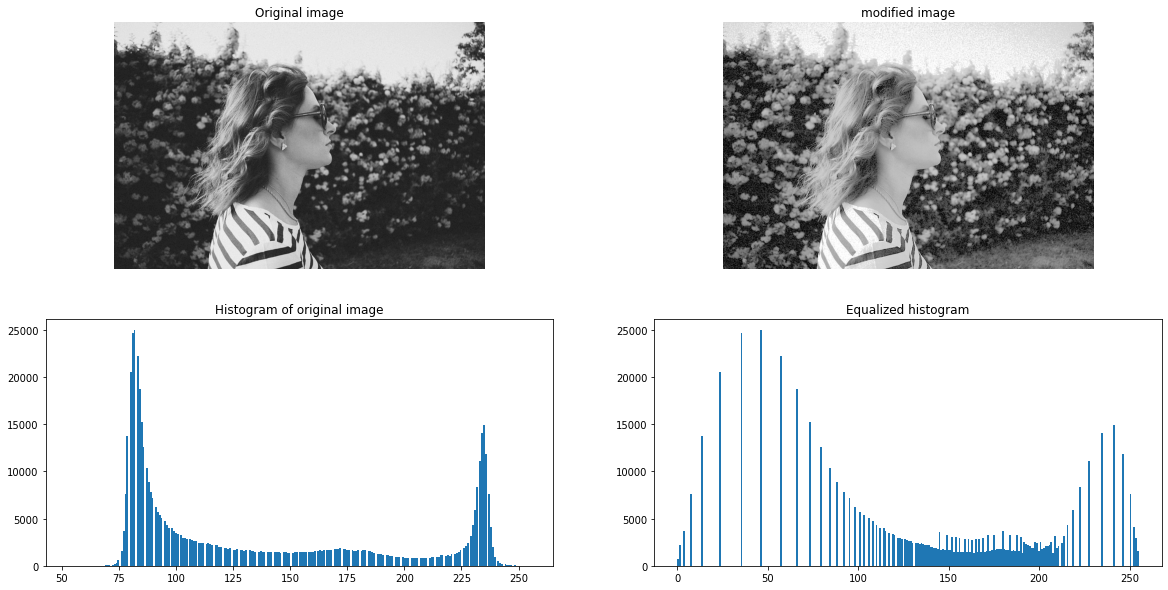

In [57]:
low = cv2.imread('/content/low.jpg',0)
histogram_equalization_gray(low)

# 2. Write a program to perform histogram equalization on a color image.
- Display the original and histogram-equalized images.
- Repeat the experiment for 3 different types (extreme dark, medium dark, and extreme
light) of input color images.


In [55]:
 def histogram_equalization_colored(img,show_histograms = True):
    # segregate color streams
    r,g,b = cv2.split(img)

    equ_r = cv2.equalizeHist(r)
    equ_g = cv2.equalizeHist(g)
    equ_b = cv2.equalizeHist(b)
    equ = cv2.merge((equ_r, equ_g, equ_b))
    
    plt.figure(figsize = (20,10))
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original image')

    plt.subplot(122)
    plt.imshow(equ)
    plt.axis('off')
    plt.title('Histogram equalized')
    plt.show()

    if show_histograms:
      plt.figure(figsize = (20,4))
      plt.subplot(131)
      plt.hist(r.flatten(),bins=256,color = "red", ec="red")
      plt.title('Original')

      plt.subplot(132)
      plt.hist(g.flatten(),bins=256,color = "green", ec="green")

      plt.subplot(133)
      plt.hist(b.flatten(),bins=256,color = "blue", ec="blue")

      plt.figure(figsize = (20,4))
      plt.subplot(131)
      plt.hist(equ_r.flatten(),bins=256,color = "red", ec="red")
      plt.title('Histogram equalized')


      plt.subplot(132)
      plt.hist(equ_g.flatten(),bins=256,color = "green", ec="green")

      plt.subplot(133)
      plt.hist(equ_b.flatten(),bins=256,color = "blue", ec="blue")

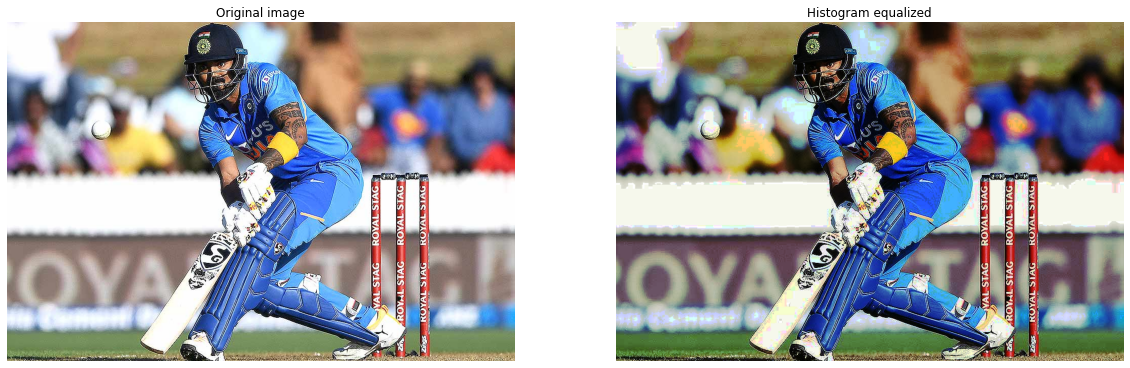

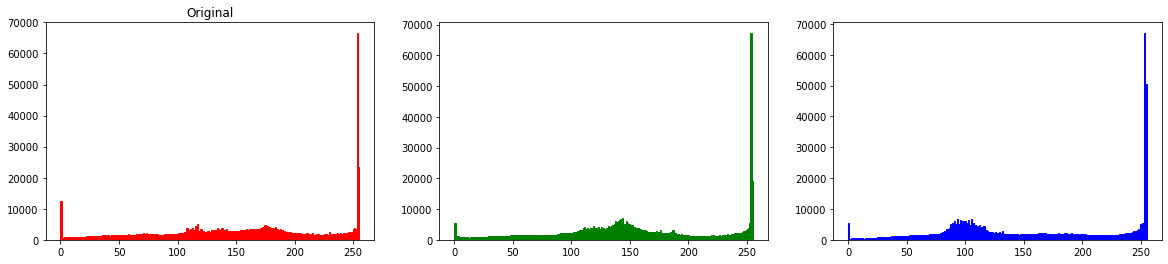

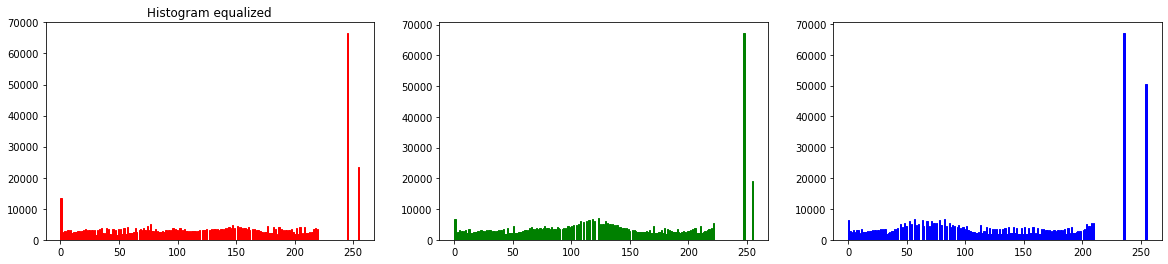

In [56]:
histogram_equalization_colored(kl)

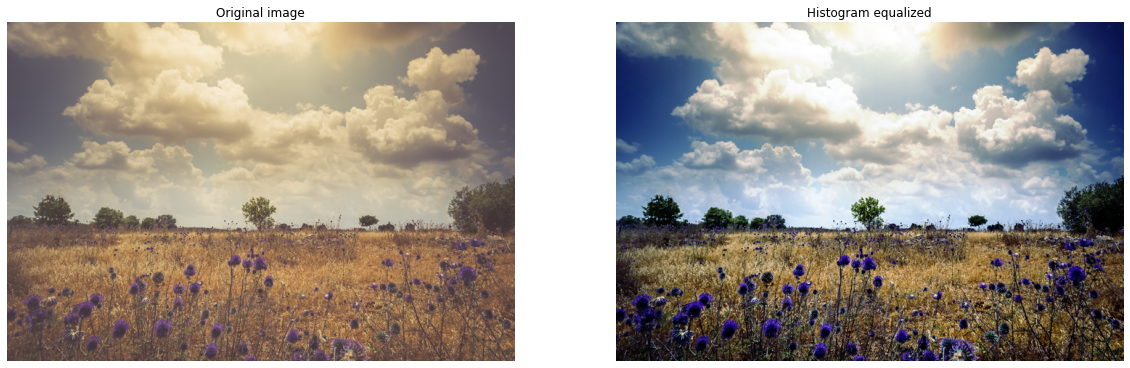

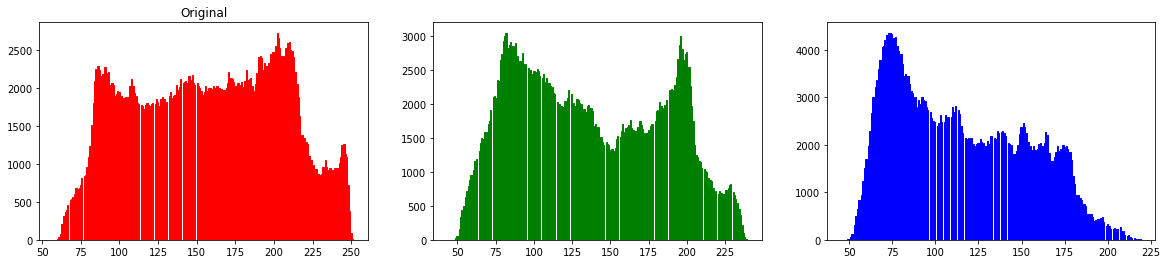

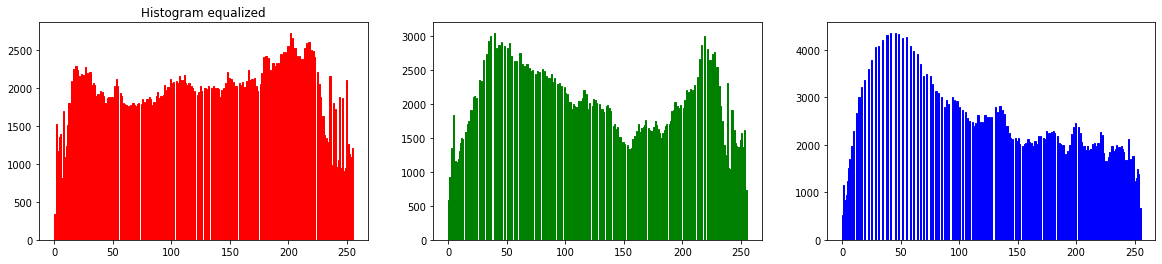

In [58]:
# low contrast
low_colored = read_image('/content/low_colored.jpg')
histogram_equalization_colored(low_colored)

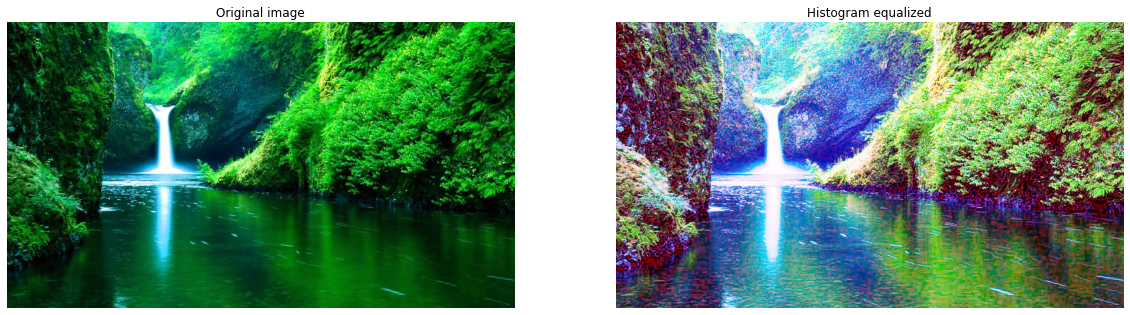

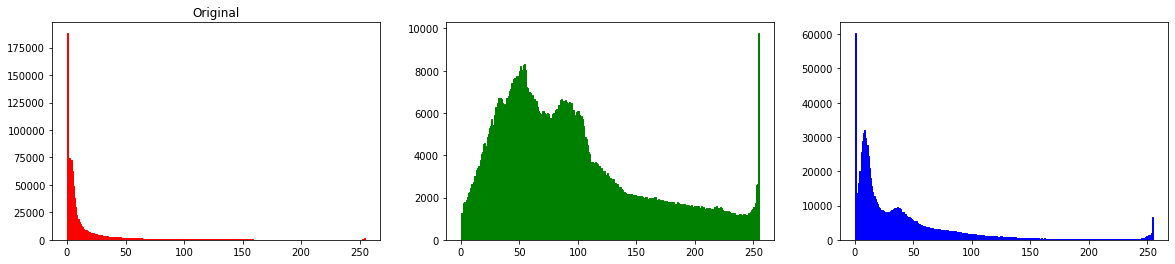

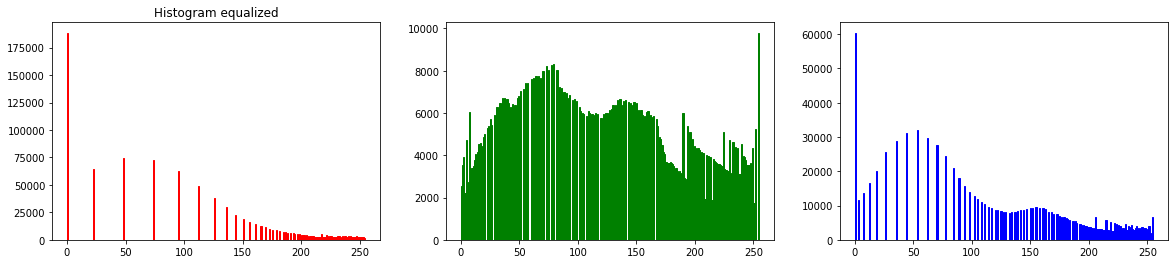

In [59]:
#dark image
nature = read_image('/content/nature.jpg')
histogram_equalization_colored(nature)